# Multicollinearity

Multicollinearity arises when two or more independent variables in our regression are highly correlated; in the extreme, one of these variables can be a linear combination of the others, resulting in perfect multicollinearity.

To illustrate the effects of multicollinearity, let's see the following regression:

$$
Y =\beta_1 + \beta_2 X + \mu
$$

Where $X$ contains a set of $k$ independent variables ($i=1, 2, ..., k$), where one of those is highly correlated to another, or several others.

We know that for the simple OLS regression the variance-covariance matrix is:

$$
var(\hat\beta)=\hat\sigma^2(X'X)^{-1}
$$
and

$$
(X'X)^{-1}=\frac{1}{|X'X|}adj(X'X)
$$

In cases of high correlation between explanatory variables the term $|X'X|$ tends to zero; in case of perfect collinearity $|X'X|=0$. One can instantly notice that this means that multicollinearity results in high variance for the estimators (and in some cases, these estimators would be impossible to determine). In an extreme case, perfect collinearity, one cannot determine the estimators associated with the matrix $X$, and the variance would be infinite. Multicollinearity ultimately results in high $R^2$ but low $t$ values; i.e. a significant model, but with non-significant estimators.

Multicollinearity can present itself in different scenarios. For example, let's imagine that a researcher wants to determine if a person suffers or not from anemia and proposes the following regression:

$$
Anemina_i=\beta_1 +\beta_2Height_i + \beta_3Weight_i + \delta_i
$$

While it is logical to think one may suffer from anemia depending on one's height or weight, these two variables tend to be highly correlated, and thus may present multicollinearity when estimating the $\beta$ estimators.

Another case would be when an economist wants to predict how much a person consumes in a month. A possible model would be:

$$
Consume_i=\alpha_1 + \alpha_2Income_i + \alpha_3Wealth +\mu_i
$$

In this case too, one may suspect collinearity, given that wealth tends to increase with income.

### References
[1] Gujarati, D. & D. Porter (2010). Econometría. Fifth edition, Mc Graw Hill.

In the following code, we analize how Python deals with the problem of multicollinearity.

# Create a 10x10 matrix following the next :

 9 vectors (columns) follow a normal distribution.

In [1]:
c1<-rnorm(10, mean=0, sd=1)
c2<-rnorm(10, mean=0, sd=1)
c3<-rnorm(10, mean=0, sd=1)
c4<-rnorm(10, mean=0, sd=1)
c5<-rnorm(10, mean=0, sd=1)
c6<-rnorm(10, mean=0, sd=1)
c7<-rnorm(10, mean=0, sd=1)
c8<-rnorm(10, mean=0, sd=1)
c9<-rnorm(10, mean=0, sd=1)
## The 10th vector is a linear combination of tree vectors.
c10<-(5*c1)+(2*c2)+c3
df <- data.frame(c1,c2,c3,c4,c5,c6,c7,c8,c9,c10)
df

c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
0.6282822,-0.3129003,-0.3245117,-0.78843107,0.70537978,0.72224819,-0.9170928,0.08907209,-1.29955344,2.1910987
0.3192504,0.9594182,1.3134489,-0.03493562,-0.73207867,1.05377177,0.8147376,-0.63047068,-0.29477170,4.8285371
0.7760531,-0.9842480,0.7541651,0.84086109,1.21949265,0.67210684,0.3645650,0.60883703,1.74170635,2.6659348
1.3485933,2.5470030,0.5099495,1.06588895,0.65239578,-0.67580010,0.7372826,1.26885854,-1.31152513,12.3469219
0.6704378,-0.8311808,0.5938607,0.43205242,-1.98196637,0.62062774,-0.4119550,0.33647032,-0.14614044,2.2836879
0.2426008,-0.4232229,-0.5296485,-0.17414121,0.52988520,-0.75810107,0.4666128,0.87477018,0.06712592,-0.1630902
1.0731996,-0.3687113,0.3203478,1.60620734,-0.01564215,-0.71331014,0.5275321,0.08356135,-0.58344316,4.9489230
-1.3274783,-1.5796011,-1.6796952,-0.25416400,0.89102805,0.32110930,-1.0300097,-0.03507275,-0.70434448,-11.4762891
-1.0361987,-1.8956900,0.7074057,0.81505040,1.38450743,1.40740881,0.4282297,-0.54800045,-0.49105851,-8.2649678
0.1119493,-0.0246686,-0.6270473,-0.30102555,0.38992082,-0.04720114,1.5596817,-1.58342531,0.46335476,-0.1166379


Try to find the inverse of this matrix and show what is the output you get in both R and Python.

In [2]:
df_inverse <- solve(df)

ERROR: Error in solve.default(df): sistema es computacionalmente singular: número de condición recíproco = 2.30237e-20


In [3]:
## We have this message because of Multicollinearity 
rm(c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,df)

In [4]:
Penn <- as.data.frame(read.table("../data/penn_jae.dat", header=T ))
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
Penn<- subset(Penn, tg==2 | tg==0)
attach(Penn)
T2 <- (tg==2) 
summary(T2)


   Mode   FALSE    TRUE 
logical    3354    2428 

In [5]:
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
2,10635,2,7,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0


Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1

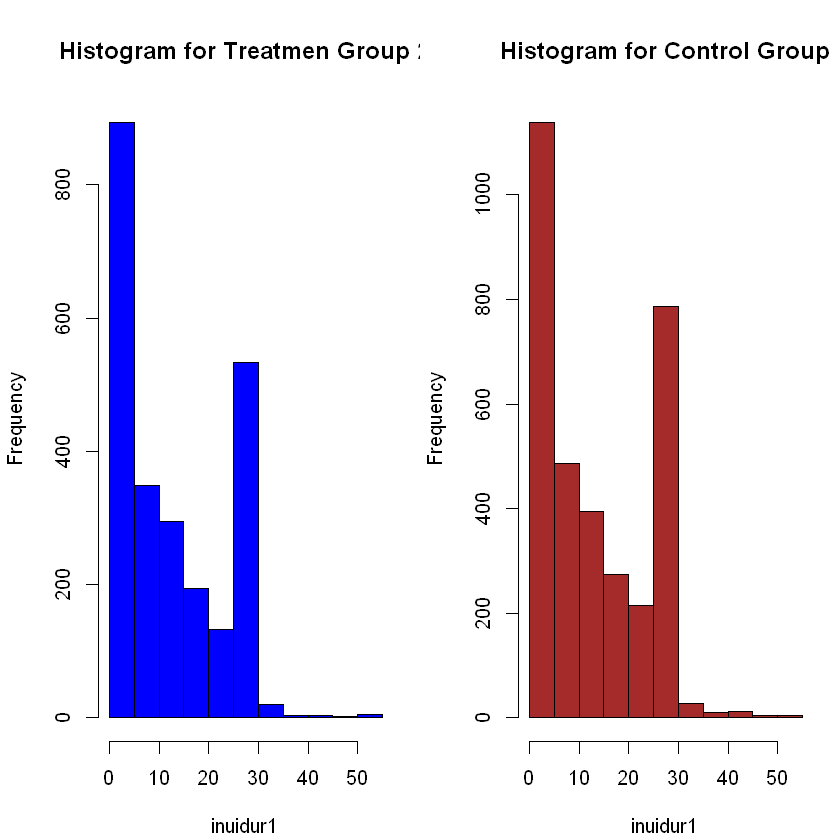

In [6]:
par(mfrow=c(1,2), mar=c(4,4,4,1)+ .1) 
hist(Penn$inuidur1[tg==2], xlab = 'inuidur1', ylab='Frequency', main='Histogram for Treatmen Group 2', col = 'blue', border = 'black')
hist(Penn$inuidur1[tg==0], xlab = 'inuidur1', ylab='Frequency', main='Histogram for Control Group', col = 'brown', border = 'black')

## Model

To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D_{2} \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is the log of duration of unemployment, $D_{2}$ is a treatment indicators, and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation. Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously. Remind that we are focusing just on the type 2 Treatment.

We also consider interactive regression model:

$$
Y =  D_{2} \alpha_1 + D_{2} W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D_{2},W', D_{2}W')' = 0,
$$

where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has the interpretation of the causal effect of the treatment 2 on the average outcome. We thus refer to $\beta_1$ as the average treatment effect (ATE). Note that the covariates, here are independent of the treatment $D$, so we can identify $\beta_1$ by just linear regression of $Y$ on $D$, without adding covariates. However we do add covariates in an effort to improve the precision of our estimates of the average treatment effect.





## Carry out covariate balance check
We check if control group is balanced to treatment group. We'll do this by estimating a Linear regression. If coefficients show no signifficance we would expect

We use the results we obtained from R since its easier.

## Regress treatment to all covariates


In [7]:
install.packages('sandwich')
install.packages('lmtest')
library(sandwich)
library(lmtest)
m <- lm(T2~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
coeftest(m, vcov=vcovHC(m,type="HC1"))


  There is a binary version available but the source version is later:
         binary source needs_compilation
sandwich  3.0-0  3.0-1             FALSE



installing the source package 'sandwich'



package 'lmtest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lmtest'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\gonza\anaconda3\envs\rstudiogc\Lib\R\library\00LOCK\lmtest\libs\x64\lmtest.dll  a C:\Users\gonza\anaconda3\envs\rstudiogc\Lib\R\library\lmtest\libs\x64\lmtest.dll: Permission denied"Warning message:
"restored 'lmtest'"


The downloaded binary packages are in
	C:\Users\gonza\AppData\Local\Temp\RtmpM7eBF2\downloaded_packages


Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.5171342  0.1568823  3.2963 0.0009856 ***
female                0.0056240  0.1324597  0.0425 0.9661352    
black                -0.0307771  0.0847262 -0.3633 0.7164293    
othrace              -0.4278818  0.3005502 -1.4237 0.1545993    
factor(dep)1          0.1576567  0.1851798  0.8514 0.3945992    
factor(dep)2         -0.1927958  0.1508926 -1.2777 0.2014067    
q2                   -0.1092161  0.1583768 -0.6896 0.4904762    
q3                   -0.1075663  0.1579864 -0.6809 0.4959890    
q4                   -0.0621302  0.1581168 -0.3929 0.6943797    
q5                   -0.0498684  0.1575034 -0.3166 0.7515450    
q6                   -0.2176336  0.1558290 -1.3966 0.1625831    
agelt35              -0.0643464  0.1326376 -0.4851 0.6276032    
agegt54               0.0259251  0.2395371  0.1082 0.9138171    
durable              -0.1256397  0.1763853 -0.7123 0.4763064    

We can see that only the intercept, the iteration othrace: factor(dep)1, othrace:q3, othrace:husd, factor(dep)2:agelt35 and factor(dep)2:durable are signifficatives 

Any way, we will run the models:

Now we save the dataframe to work in python.

In [8]:
# get same dataframe
X <- as.data.frame( model.matrix(m) )

no_col <- attributes(m$coefficients)$names[is.na(m$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]
save( X1, file = "../data/m_reg.RData")

# Model Specification

In [9]:
### 2.1. classical 2-sample approach, no adjustment (CL)
formula_cl <- log(inuidur1)~T2
### 2.2. classical linear regression adjustment (CRA)
formula_cra <- log(inuidur1)~T2+(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2

ols.cl_reg<-lm(formula_cl)
ols.cra_reg <- lm(formula_cra)

ols.cl=coeftest(ols.cl_reg, vcov=vcovHC(ols.cl_reg, type="HC1"))
ols.cra=coeftest(ols.cra_reg, vcov=vcovHC(ols.cra_reg, type="HC1"))

print(ols.cl)  ## T2TRUE: -0.078825
print(ols.cra) ## T2TRUE: -0.0712066



t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.056830   0.020954 98.1580  < 2e-16 ***
T2TRUE      -0.078825   0.032509 -2.4247  0.01535 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           2.4471832  0.3580899  6.8340 9.123e-12 ***
T2TRUE               -0.0712066  0.0320440 -2.2222 0.0263124 *  
female               -0.9428048  0.2827961 -3.3339 0.0008620 ***
black                -0.6654258  0.2430567 -2.7377 0.0062056 ** 
othrace              -1.5494550  0.7312071 -2.1190 0.0341306 *  
factor(dep)1          0.2798498  0.3783316  0.7397 0.4595160    
factor(dep)2          0.1678164  0.3678718  0.4562 0.6482768    
q2                    0.0271228  0.3606226  0.0752 0.9400495    
q3                   -0.3542370  0.3601780 -0.9835 0.3254005    
q4                   -0.3380244  0.3606994 -0.9371 0.3487284    
q5 

In [10]:
# get same dataframe for ols.cl
X <- as.data.frame( model.matrix(ols.cl_reg) )

no_col <- attributes(ols.cl_reg$coefficients)$names[is.na(ols.cl_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = "../data/ols_cl_reg.RData")



# get same dataframe for ols.cl
X <- as.data.frame( model.matrix(ols.cra_reg) )

no_col <- attributes(ols.cra_reg$coefficients)$names[is.na(ols.cra_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = "../data/ols_cra_reg.RData")


The interactive specificaiton corresponds to the approach introduced in Lin (2013).

In [11]:
# 2.3. interactive regression adjustment (IRA)
# First, we will create the iterations
X = model.matrix (~ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1]
dim(X)
demean<- function(x){ x - mean(x)}
X = apply(X, 2, demean)
ols.ira_reg = lm(log(inuidur1) ~ T2*X)
ols.ira= coeftest(ols.ira_reg, vcov = vcovHC(ols.ira_reg, type="HC1"))
print(ols.ira) # T2TRUE: -0.0699044





[1] 5782  119


t test of coefficients:

                               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                   2.0556976  0.0207138 99.2430 < 2.2e-16 ***
T2TRUE                       -0.0699044  0.0320764 -2.1793 0.0293503 *  
Xfemale                      -0.6662823  0.4080234 -1.6330 0.1025357    
Xblack                       -0.8634862  0.2969435 -2.9079 0.0036528 ** 
Xothrace                     -3.8176881  0.9366193 -4.0760 4.645e-05 ***
Xfactor(dep)1                 0.0359264  0.6476816  0.0555 0.9557666    
Xfactor(dep)2                 0.2117556  0.4512231  0.4693 0.6388790    
Xq2                          -0.2546436  0.4553391 -0.5592 0.5760207    
Xq3                          -0.6212326  0.4549639 -1.3655 0.1721653    
Xq4                          -0.4799269  0.4561206 -1.0522 0.2927566    
Xq5                          -0.3718675  0.4538882 -0.8193 0.4126542    
Xq6                          -0.6770474  0.4521499 -1.4974 0.1343469    
Xagelt35                 

In [12]:
# get same dataframe for ols.ira
S <- as.data.frame( model.matrix(ols.ira_reg) )

no_col <- attributes(ols.ira_reg$coefficients)$names[is.na(ols.ira_reg$coefficients)]

S1  <- S[, -which(names( S ) %in% no_col ) ]


save( S1, file = "../data/ols_ira_reg.RData")


## IRA USING LASSO

In [13]:
library(hdm)
T2=demean(T2)
DX=model.matrix(~T2*X)[,-1]
rlasso.ira=summary(rlassoEffects(DX, log(inuidur1), index=1)) 
print(rlasso.ira) # T2TRUE: -0.07457

Warning message:
"package 'hdm' was built under R version 3.6.3"

[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




In [14]:
# getting data
S = as.data.frame(DX)
save( S, file = "../data/rlasso_ira_reg.RData")


In [15]:

library(xtable)
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]
table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]
colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")
table

Warning message:
"package 'xtable' was built under R version 3.6.3"

,CL,CRA,IRA,IRA w Lasso
estimate,-0.07882533,-0.07120664,-0.06990440,-0.07457328
standard error,0.03250889,0.03204403,0.03207638,0.03208892


Treatment group 2 experiences an average decrease of about $7.4$ % in the length of unemployment spell.

Observe that regression estimators delivers estimates that are slighly more efficient (lower standard errors) than the simple 2 mean estimator, but essentially all methods have very similar standard errors.

Now we show if there´s heterogenity for the treatment effect between certain groups.



## Plotting coefficients

In this section, we interpret the effect of certain two-way interactions with the treatment over the period of unemployment.

also installing the dependencies 'tidyr', 'plotly'




  There is a binary version available but the source version is later:
       binary  source needs_compilation
plotly  4.9.3 4.9.4.1             FALSE

package 'tidyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\gonza\anaconda3\envs\rstudiogc\Lib\R\library\00LOCK\tidyr\libs\x64\tidyr.dll  a C:\Users\gonza\anaconda3\envs\rstudiogc\Lib\R\library\tidyr\libs\x64\tidyr.dll: Permission denied"Warning message:
"restored 'tidyr'"

package 'coefplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gonza\AppData\Local\Temp\RtmpM7eBF2\downloaded_packages


installing the source package 'plotly'

Warning message in install.packages("coefplot"):
"installation of package 'plotly' had non-zero exit status"Warning message:
"package 'coefplot' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead."Warning message:
"It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead."Warning message:
"It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead."

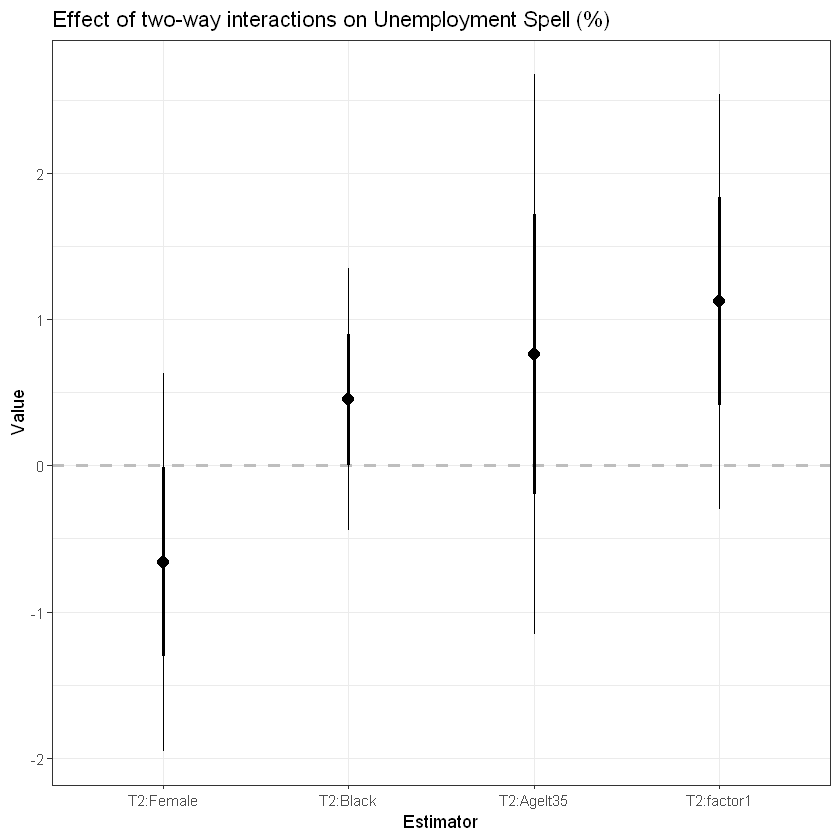

In [16]:
install.packages("coefplot")
library(coefplot)
ols.ira_reg = lm(log(inuidur1) ~ T2*X)
coefplot(ols.ira_reg, coefficients = c('T2:Xfemale' ,'T2:Xblack','T2:Xagelt35','T2:Xfactor(dep)1'), y="Estimator", horizontal=TRUE , color = "black" ,  
         title = "Effect of two-way interactions on Unemployment Spell (%)") + theme_bw() + scale_y_discrete(labels=c("T2:Female", "T2:Black", "T2:Agelt35", "T2:factor1"))


Remember that, in general, we found that the program has a negative effect on the length of unemployment. However, here we can notice that the treatment effect may vary depending on certain characteristics of the sample. If the unemployed person is female, then receiving the treatment still has a negative effect on the period of unemployment, but this does not remain true when the person is black, or their age is below 35. Being part of these latter groups, and receiving the treatment may in fact have a positive effect on the length of unemployment. Though we must remember that this differentiated effect is only significant for the group of age below 35.